                                                      44.4 PROJECT Цели: 
Гипотеза 1. Определить, насколько обучение сокращает время прохождения этапов игры.                                    

Гипотеза 2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

Гипотеза 3. Определить, насколько прозрачен процесс взаимодействия с игрой.

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
purchase_df = pd.read_csv('data/purchase.csv', sep=',')
events_df = pd.read_csv('data/7_4_Events.csv', sep=',')
condition = (events_df.start_time >= '2018-01-01') & (events_df.start_time < '2019-01-01') & (events_df.event_type =='registration')
registered = events_df[condition]['user_id'].to_list()
events_2018 = events_df[events_df.user_id.isin(registered)]
events_2018.start_time = pd.to_datetime(events_2018.start_time, format='%Y-%m-%dT%H:%M:%S')
purchase_2018 = purchase_df[purchase_df['user_id'].isin(registered)]
purchase_2018.event_datetime = pd.to_datetime(purchase_2018.event_datetime, format='%Y-%m-%dT%H:%M:%S')
purchase_2018["event_type"] = 'purchase'
events_2018 = events_2018.rename(columns={"id": "event_id"})
purchase_2018 = purchase_2018.rename(columns={"id": "purchase_id"})
purchase_2018 = purchase_2018.rename(columns={"event_datetime": "start_time"}) 
total_events_df = pd.concat([events_2018,purchase_2018],sort=False)
total_events_df = total_events_df.reset_index(drop=True).sort_values('start_time')
registration_df = total_events_df[total_events_df['event_type'] == 'registration']
registration_df = registration_df[["user_id", "start_time"]].rename(columns={"start_time": "registration_time"})
first_purchase_df = total_events_df[total_events_df['event_type'] == 'purchase']
first_purchase_df = first_purchase_df[["user_id", "start_time"]].rename(columns={"start_time": "first_purchase_time"})


/var/folders/2t/41ymw9416szdry3f82rfxvr80000gn/T/ipykernel_48003/1547488935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2018.start_time = pd.to_datetime(events_2018.start_time, format='%Y-%m-%dT%H:%M:%S')
/var/folders/2t/41ymw9416szdry3f82rfxvr80000gn/T/ipykernel_48003/1547488935.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_2018.event_datetime = pd.to_datetime(purchase_2018.event_datetime, format='%Y-%m-%dT%H:%M:%S')
/var/folders/2t/41ymw9416szdry3f82rfxvr80000gn/T/ipykernel_

                                                          Гипотеза 1

In [212]:
# Создаем группы пользователей в зависимости от обучения:
users_with_started_tutorial = total_events_df[total_events_df['event_type'] == 'tutorial_start']["user_id"].unique()
users_with_finished_tutorial = total_events_df[total_events_df["event_type"] == "tutorial_finish"]["user_id"].unique()
all_users = total_events_df["user_id"].unique()
set_all_users = set(all_users)
set_users_with_started_tutorial = set(users_with_started_tutorial)
set_users_not_started_tutorial = set_all_users.difference(set_users_with_started_tutorial)
print(len(users_with_started_tutorial),len(users_with_finished_tutorial),len(set_users_not_started_tutorial))

11858 10250 8068


In [252]:
# Для каждой группы создаем датафреймы с событиями регистрации и оплаты:
started_tutorial_registration_df = total_events_df[total_events_df["event_type"] == "registration"]
started_tutorial_registration_df = started_tutorial_registration_df[started_tutorial_registration_df['user_id'].isin(users_with_started_tutorial)]
started_tutorial_registration_df = started_tutorial_registration_df.sort_values('start_time').drop_duplicates('user_id')

finished_tutorial_registration_df = total_events_df[total_events_df["event_type"] == "registration"]
finished_tutorial_registration_df = finished_tutorial_registration_df[finished_tutorial_registration_df['user_id'].isin(users_with_finished_tutorial)]
finished_tutorial_registration_df = finished_tutorial_registration_df.sort_values('start_time').drop_duplicates('user_id')

not_started_tutorial_registration_df = total_events_df[total_events_df["event_type"] == "registration"]
not_started_tutorial_registration_df = not_started_tutorial_registration_df[not_started_tutorial_registration_df['user_id'].isin(set_users_not_started_tutorial)]
not_started_tutorial_registration_df = not_started_tutorial_registration_df.sort_values('start_time').drop_duplicates('user_id')

started_tutorial_purchase_df = total_events_df[total_events_df["event_type"] == "purchase"]
started_tutorial_purchase_df = started_tutorial_purchase_df[started_tutorial_purchase_df['user_id'].isin(users_with_started_tutorial)]
started_tutorial_purchase_df = started_tutorial_purchase_df.sort_values('start_time').drop_duplicates('user_id')

finished_tutorial_purchase_df = total_events_df[total_events_df["event_type"] == "purchase"]
finished_tutorial_purchase_df = finished_tutorial_purchase_df[finished_tutorial_purchase_df['user_id'].isin(users_with_finished_tutorial)]
finished_tutorial_purchase_df = finished_tutorial_purchase_df.sort_values('start_time').drop_duplicates('user_id')

not_started_tutorial_purchase_df = total_events_df[total_events_df["event_type"] == "purchase"]
not_started_tutorial_purchase_df = not_started_tutorial_purchase_df[not_started_tutorial_purchase_df['user_id'].isin(set_users_not_started_tutorial)]
not_started_tutorial_purchase_df = not_started_tutorial_purchase_df.sort_values('start_time').drop_duplicates('user_id')

finished_tutorial_purchase_df1 = finished_tutorial_purchase_df[["user_id", "start_time"]].rename(columns={"start_time": "purchase_time"})
not_started_tutorial_purchase_df1 = not_started_tutorial_purchase_df[["user_id", "start_time"]].rename(columns={"start_time": "purchase_time"})

96.50090205789756
105.10053030303033


,group_name,hour
0,finished_tutorial,96.5
1,not_started_tutorial,105.1


Text(0.5, 1.0, 'Время прохождения от этапа регистрации до оплаты для пользователей')

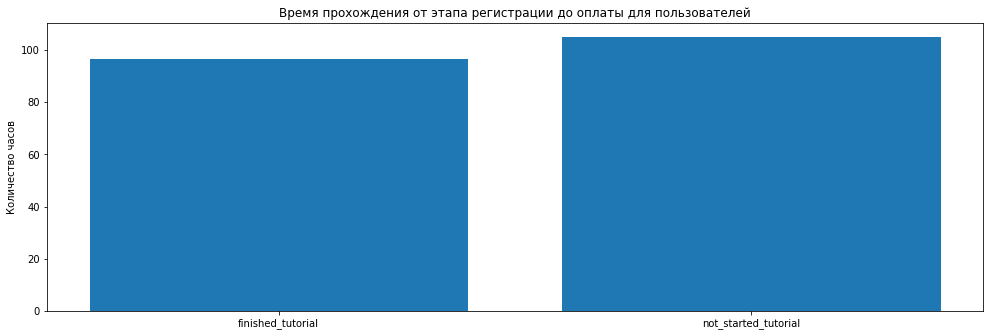

In [254]:
# Для каждой группы подсчитываем среднее время между событиями оплаты и регистрации:
merged_df_2 = finished_tutorial_registration_df.merge(finished_tutorial_purchase_df1, on="user_id", how="inner")
merged_df_2["timedelta"] = (merged_df_2["purchase_time"] - merged_df_2["start_time"])/pd.Timedelta('1 hour')
print(merged_df_2["timedelta"].mean())
merged_df_3 = not_started_tutorial_registration_df.merge(not_started_tutorial_purchase_df1, on="user_id", how="inner")
merged_df_3["timedelta"] = (merged_df_3["purchase_time"] - merged_df_3["start_time"])/pd.Timedelta('1 hour')
print(merged_df_3["timedelta"].mean())
data = {'group_name': ['finished_tutorial','not_started_tutorial'],
        'hour': [96.5, 105.1]}
df = pd.DataFrame(data)
display(df)

# Визуализируем результат:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = df.group_name, height = df.hour);
main_axes.set_ylabel('Количество часов')
main_axes.set_title('Время прохождения от этапа регистрации до оплаты для пользователей')

In [258]:
# Для каждой группы создаем датафреймы с событиями выбора уровня сложности:
not_started_tutorial_level_choice_df = total_events_df[total_events_df["event_type"] == 'level_choice']
not_started_tutorial_level_choice_df = not_started_tutorial_level_choice_df[not_started_tutorial_level_choice_df["user_id"].isin(set_users_not_started_tutorial)]
not_started_tutorial_level_choice_df = not_started_tutorial_level_choice_df.sort_values('start_time').drop_duplicates('user_id')
finished_tutorial_level_choice_df = total_events_df[total_events_df["event_type"] == 'level_choice']
finished_tutorial_level_choice_df = finished_tutorial_level_choice_df[finished_tutorial_level_choice_df["user_id"].isin(users_with_finished_tutorial)]
finished_tutorial_level_choice_df = finished_tutorial_level_choice_df.sort_values('start_time').drop_duplicates('user_id')
not_started_tutorial_level_choice_df1 = not_started_tutorial_level_choice_df[["user_id", "start_time"]].rename(columns={"start_time": "level_choice_time"})
finished_tutorial_level_choice_df1 = finished_tutorial_level_choice_df[["user_id", "start_time"]].rename(columns={"start_time": "level_choice_time"})

89.39026510788604
100.91563131313129


,group_name,hour
0,finished_tutorial,89.39
1,not_started_tutorial,100.91


Text(0.5, 1.0, 'Время прохождения от этапа выбора уровня сложности до оплаты для пользователей')

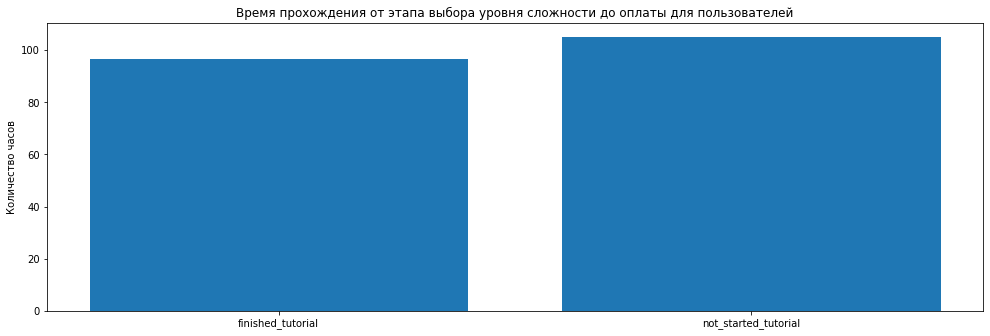

In [260]:
# Для каждой группы подсчитываем среднее время между событиями оплаты и выбора уровня сложности:
merged_df_4 = finished_tutorial_level_choice_df1.merge(finished_tutorial_purchase_df1, on="user_id", how="inner")
merged_df_4["timedelta"] = (merged_df_4["purchase_time"] - merged_df_4["level_choice_time"])/pd.Timedelta('1 hour')
print(merged_df_4["timedelta"].mean())
merged_df_5 = not_started_tutorial_level_choice_df1.merge(not_started_tutorial_purchase_df1, on="user_id", how="inner")
merged_df_5["timedelta"] = (merged_df_5["purchase_time"] - merged_df_5["level_choice_time"])/pd.Timedelta('1 hour')
print(merged_df_5["timedelta"].mean())
data = {'group_name': ['finished_tutorial','not_started_tutorial'],
        'hour': [89.39, 100.91]}
df1 = pd.DataFrame(data)
display(df1)

# Визуализируем результат:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = df.group_name, height = df.hour);
main_axes.set_ylabel('Количество часов')
main_axes.set_title('Время прохождения от этапа выбора уровня сложности до оплаты для пользователей')

In [261]:
# Для каждой группы создаем датафреймы с событиями выбора пакетов вопросов:
not_started_tutorial_pack_choice_df = total_events_df[total_events_df["event_type"] == 'pack_choice']
not_started_tutorial_pack_choice_df = not_started_tutorial_pack_choice_df[not_started_tutorial_pack_choice_df["user_id"].isin(set_users_not_started_tutorial)]
not_started_tutorial_pack_choice_df = not_started_tutorial_pack_choice_df.sort_values('start_time').drop_duplicates('user_id')
finished_tutorial_pack_choice_df = total_events_df[total_events_df["event_type"] == 'pack_choice']
finished_tutorial_pack_choice_df = finished_tutorial_pack_choice_df[finished_tutorial_pack_choice_df["user_id"].isin(users_with_finished_tutorial)]
finished_tutorial_pack_choice_df = finished_tutorial_pack_choice_df.sort_values('start_time').drop_duplicates('user_id')
not_started_tutorial_pack_choice_df1 = not_started_tutorial_pack_choice_df[["user_id", "start_time"]].rename(columns={"start_time": "pack_choice_time"})
finished_tutorial_pack_choice_df1 = finished_tutorial_pack_choice_df[["user_id", "start_time"]].rename(columns={"start_time": "pack_choice_time"})

89.29990036857868
100.82599747474747


,group_name,hour
0,finished_tutorial,89.29
1,not_started_tutorial,100.82


Text(0.5, 1.0, 'Время прохождения от этапа выбора пакетов вопросов до оплаты для пользователей')

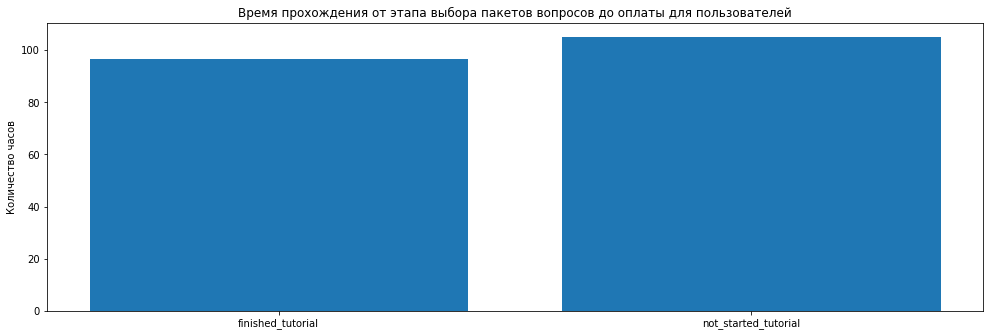

In [262]:

# Для каждой группы подсчитываем среднее время между событиями оплаты и выбором пакетов вопросов:
merged_df_6 = finished_tutorial_pack_choice_df1.merge(finished_tutorial_purchase_df1, on="user_id", how="inner")
merged_df_6["timedelta"] = (merged_df_6["purchase_time"] - merged_df_6["pack_choice_time"])/pd.Timedelta('1 hour')
print(merged_df_6["timedelta"].mean())
merged_df_7 = not_started_tutorial_pack_choice_df1.merge(not_started_tutorial_purchase_df1, on="user_id", how="inner")
merged_df_7["timedelta"] = (merged_df_7["purchase_time"] - merged_df_7["pack_choice_time"])/pd.Timedelta('1 hour')
print(merged_df_7["timedelta"].mean())
data = {'group_name': ['finished_tutorial','not_started_tutorial'],
        'hour': [89.29, 100.82]}
df1 = pd.DataFrame(data)
display(df1)

# Визуализируем результат:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = df.group_name, height = df.hour);
main_axes.set_ylabel('Количество часов')
main_axes.set_title('Время прохождения от этапа выбора пакетов вопросов до оплаты для пользователей')

In [263]:
# Создаем датафреймы с событиями регистрации и началом обучения для группы с оконченным обучением:
finished_tutorial_registration_df = total_events_df[total_events_df["event_type"] == "registration"]
finished_tutorial_registration_df = finished_tutorial_registration_df[finished_tutorial_registration_df['user_id'].isin(users_with_finished_tutorial)]
finished_tutorial_registration_df = finished_tutorial_registration_df.sort_values('start_time').drop_duplicates('user_id')
finished_tutorial_tutorial_start_df = total_events_df[total_events_df["event_type"] == "tutorial_start"]
finished_tutorial_tutorial_start_df = finished_tutorial_tutorial_start_df[finished_tutorial_tutorial_start_df["user_id"].isin(users_with_finished_tutorial)]
finished_tutorial_tutorial_start_df = finished_tutorial_tutorial_start_df.sort_values('start_time').drop_duplicates('user_id')
finished_tutorial_tutorial_start_df1 = finished_tutorial_tutorial_start_df[["user_id", "start_time"]].rename(columns={"start_time": "tutorial_start"})

# Создаем датафреймы с событиями регистрации и выбором уровня сложности для группы без обучения:
not_started_tutorial_registration_df = total_events_df[total_events_df["event_type"] == "registration"]
not_started_tutorial_registration_df = not_started_tutorial_registration_df[not_started_tutorial_registration_df['user_id'].isin(set_users_not_started_tutorial)]
not_started_tutorial_registration_df = not_started_tutorial_registration_df.sort_values('start_time').drop_duplicates('user_id')
not_started_tutorial_level_choice_df = total_events_df[total_events_df["event_type"] == 'level_choice']
not_started_tutorial_level_choice_df = not_started_tutorial_level_choice_df[not_started_tutorial_level_choice_df["user_id"].isin(set_users_not_started_tutorial)]
not_started_tutorial_level_choice_df = not_started_tutorial_level_choice_df.sort_values('start_time').drop_duplicates('user_id')
not_started_tutorial_level_choice_df1 = not_started_tutorial_level_choice_df[["user_id", "start_time"]].rename(columns={"start_time": "level_choice_time"})


4.518038373983739
5.259200680272109


,group_name,hour
0,finished_tutorial,4.52
1,not_started_tutorial,5.26


Text(0.5, 1.0, 'Время прохождения регистрации для пользователей с обучением и без обучения')

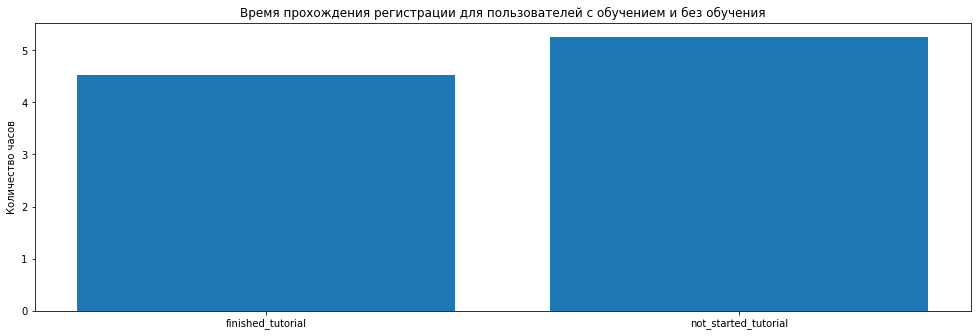

In [366]:
# Подсчитываем среднее время между событиями регистрации и началом обучения для группы с оконченным обучением:
merged_df_8 = finished_tutorial_registration_df.merge(finished_tutorial_tutorial_start_df1, on="user_id", how="inner")
merged_df_8["timedelta"] = (merged_df_8["tutorial_start"] - merged_df_8["start_time"])/pd.Timedelta('1 hour')
print(merged_df_8["timedelta"].mean())

# Подсчитываем среднее время между событиями регистрации и выбором уровня сложности для группы без обучения:
merged_df_9 = not_started_tutorial_registration_df.merge(not_started_tutorial_level_choice_df1, on="user_id", how="inner")
merged_df_9["timedelta"] = (merged_df_9["level_choice_time"] - merged_df_9["start_time"])/pd.Timedelta('1 hour')
print(merged_df_9["timedelta"].mean())
data = {'group_name': ['finished_tutorial','not_started_tutorial'],
        'hour': [4.52, 5.26]}
df = pd.DataFrame(data)
display(df)

# Визуализируем результат:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = df.group_name, height = df.hour);
main_axes.set_ylabel('Количество часов')
main_axes.set_title('Время прохождения регистрации для пользователей с обучением и без обучения')

                                                          Гипотеза 2

,tutorial_attempts,user_id,purchase,percent
,,count,sum,
0,0,8068,22,0.27
1,1,9103,1207,13.26
2,2,1589,218,13.72
3,3,427,51,11.94
4,4,221,30,13.57
5,5,109,16,14.68
6,6,116,14,12.07
7,7,94,12,12.77
8,8,86,13,15.12


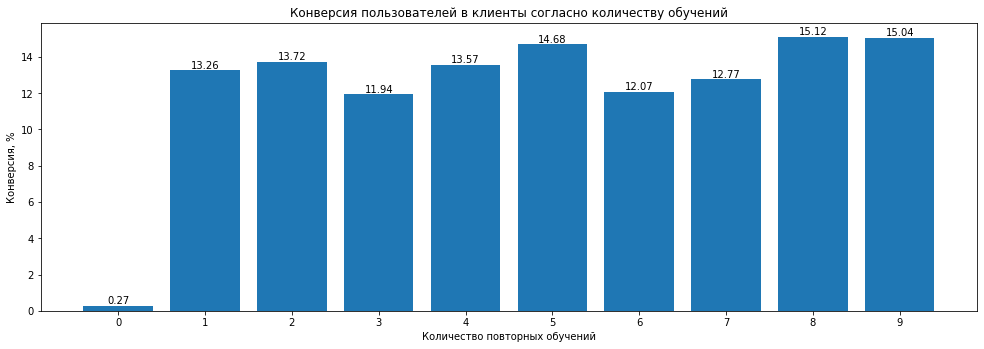

In [362]:
# Создаем список пользователей совершивших покупку:
set_users_with_purchase = set(total_events_df[total_events_df['event_type'] == 'purchase']["user_id"].unique())
users_with_tutorial = total_events_df[total_events_df['event_type'] == 'tutorial_id']["user_id"].unique()
# Создаем DF с количеством законченных обучений:
tutorial_attempts_df = total_events_df.groupby('user_id')['tutorial_id'].nunique().reset_index()
tutorial_attempts_df = tutorial_attempts_df.rename(columns={'tutorial_id':'tutorial_attempts'})
# Добавляем столбец purchase с количеством оплат:
tutorial_attempts_df['purchase'] = tutorial_attempts_df.apply(lambda x: 1 if x['user_id'] in set_users_with_purchase else 0, axis=1)
# Группируем согласно попыткам обучения:
df_tutorial = tutorial_attempts_df.groupby(by=['tutorial_attempts'],as_index=True).agg({'user_id':['count'],'purchase':['sum']}).sort_values(by='tutorial_attempts', ascending=True).reset_index()
# Добавляем столбец percent с конверсией пользователей в клиенты:
df_tutorial['percent']= round(((df_tutorial['purchase']['sum']/df_tutorial['user_id']['count'])*100),2)
display(df_tutorial)

# Визуализируем результат:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = df_tutorial['tutorial_attempts'], height = df_tutorial['percent']);
main_axes.set_xlabel('Количество повторных обучений')
main_axes.set_ylabel('Конверсия, %')
main_axes.set_xticks(df_tutorial['tutorial_attempts'])
main_axes.set_title('Конверсия пользователей в клиенты согласно количеству обучений')

x = df_tutorial['tutorial_attempts']
y = df_tutorial['percent']
for i in list(x):
    plt.text(i,y[i],y[i], ha= "center", va= "bottom")

                                                Гипотеза 3

In [278]:
# Создаем датафреймы с событиями начало обучения и выбором уровня сложности:
started_tutorial_df = total_events_df[total_events_df["event_type"] == "tutorial_start"]
started_tutorial_level_choice_df = total_events_df[total_events_df["event_type"] == "level_choice"]
started_tutorial_level_choice_df1 = started_tutorial_level_choice_df[["user_id", "start_time"]].rename(columns={"start_time": "level_choice_time"})

# Объединяем датафреймы с началом обучения и выбором уровня сложности по user_id:
merged_df_10 = started_tutorial_df.merge(started_tutorial_level_choice_df1, on="user_id", how="inner")

# Подсчитываем время между событиями начало обучения и выбором уровня сложности:
merged_df_10["timedelta"] = (merged_df_10["start_time"]- merged_df_10["level_choice_time"])/pd.Timedelta('1 hour')
merged_df_10 = merged_df_10[merged_df_10["timedelta"] > 0]
merged_df_10['user_id'].nunique()

1386

                                              Выводы

Гипотеза 1. В рамках проверки гипотезы, результаты исследования поведения пользователей показали, что время прохождения различных этапов у пользователей, которые прошли обучение, и пользователей, не начинавших обучение, отличаются. Так была выяснена закономерность, что пользователи, которые прошли обучение, проходят все этапы игры быстрее, чем пользователи, не начинавшие обучение.  
Например, время прохождения от этапа регистрации до оплаты для пользователей, которые прошли обучение, составляет 96.5 часов, а для пользователей, не начинавших обучение 105.1 часов. 
Время прохождения от этапа выбора уровня сложности до оплаты для пользователей, которые прошли обучение, составляет 89.39 часов, а для пользователей, не начинавших обучение 100.91 часов.

Гипотеза 2. Результаты исследования показали, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно идет. Таким образом, наибольший процент пользователей, оплативших вопросы, приходится на пользователей, прошедших 1 и более обучений и составляет примерно 12-15%. А наименьший процент пользователей, оплативших вопросы, приходится на пользователей, не проходивших обучение ни разу. Он составляет всего 0,27%.

Гипотеза 3. 1386 пользователей начинают обучение после выбора уровня сложности тренировок. Это позволяет оценить прозрачность процесса взаимодействия с игрой и показывает, что работа с приложением непонятна достаточно большому количеству пользователей, так как они после выбора уровня сложности тренировок обращаются к обучению.